Activity 1
Analog IC Characterization: The Wideband RC Voltage-Divider

I. INTRODUCTION

The frequency-independent signal attenuator is a fundamental building block in high-bandwidth analog measurement systems, where accurate signal scaling must be maintained over a wide range of frequencies. Simple resistive voltage dividers, while effective at low frequencies, often exhibit frequency-dependent behavior when parasitic capacitances and source or load impedances are introduced. These effects become especially pronounced in wideband applications, leading to signal distortion, amplitude errors, and phase shift.

To address these limitations, RC compensation techniques are employed. By intentionally adding capacitive elements in parallel with resistive components, the frequency response of the divider can be shaped to achieve flat attenuation across a broad spectrum. This principle is widely used in practical instrumentation such as oscilloscope probes, data acquisition front-ends, and analog integrated circuits, where maintaining signal integrity is critical.

This laboratory activity examines the wideband RC voltage divider as a representative analog IC building block. Students will explore the theoretical basis of RC compensation, including pole-zero cancellation and time-constant matching, and observe how these concepts translate into real circuit behavior. Emphasis is placed on understanding how component values influence bandwidth, transient response, and overall signal fidelity.

In addition to theory, the laboratory integrates circuit simulation using NGSPICE within a Visual Studio Code (VS Code) workflow. This environment mirrors modern engineering practice by combining schematic-level analysis with script-based simulation and waveform inspection. Through simulation, students will characterize both uncompensated and compensated dividers in the time and frequency domains, reinforcing the connection between mathematical models and observable circuit performance.

II. MATERIALS AND EQUIPMENT

Computing Workstation (PC or Laptop)

Integrated Development Environment (IDE): Visual Studio Code

NGSPICE Simulator: (Version 42+)

Python 3.x (pandas, matplotlib, numpy, schemdraw)

III. PROCEDURES

PHASE 1: INSTALLATION & SYSTEM CONFIGURATION

Step 1: Install NGSPICE (The Simulator)

    Download ngspice-42_64.zip from the NGSPICE SourceForge page.

    Extract the file and copy the Spice64 folder.

    Paste it directly into the C: drive:

            C:\Spice64
    
    Verify that ngspice.exe exists in:

            C:\Spice64\bin

Step 2: Add NGSPICE to Windows PATH

    Copy Path:

        C:\Spice64\bin

    Open Edit the system environment variables.

    Under System variables → Path → Edit → New, paste the path.

    Click OK to save.

Step 3: Verify in VS Code

    Restart VS Code.

    Open the terminal (Ctrl + `).

    Run:

        ngspice -v
    
    The NGSPICE version output confirms successful installation.

PHASE 2: PYTHON ENVIRONMENT SETUP
Install Required Python Libraries

Purpose:
These libraries will be used for circuit visualization (schemdraw), data handling (pandas), numerical analysis (numpy), and plotting simulation results (matplotlib).

In [ ]:
%pip install schemdraw pandas matplotlib numpy -v

In [1]:
import schemdraw
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import schemdraw.elements as elm
import os
import subprocess

print(f"Schemdraw:  {schemdraw.__version__}")
print(f"Pandas:     {pd.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Numpy:      {np.__version__}")

Schemdraw:  0.22
Pandas:     3.0.0
Matplotlib: 3.10.8
Numpy:      2.4.2


Verify NGSPICE Availability

Purpose:
Confirms that NGSPICE is correctly installed and accessible from the Jupyter Notebook environment before running simulations.

In [2]:
# Robust verification: This checks if NGSPICE is accessible
try:
    result = subprocess.run(["ngspice", "-v"], capture_output=True, text=True)
    if result.stdout:
        # Print the first available line of the version info
        print(f"NGSPICE Found: {result.stdout.splitlines()[0]}")
    else:
        print("NGSPICE executed but returned no version text.")
except FileNotFoundError:
    print("ERROR: NGSPICE not found. Please check your Windows PATH and restart VS Code.")

NGSPICE executed but returned no version text.


PHASE 3: CIRCUIT SCHEMATIC VISUALIZATION
Draw RC Divider Circuit

Purpose:
This cell visualizes the wideband RC voltage divider, showing:
    R1 with compensation capacitor C1
    Load resistor R2 and load capacitor C2
    Input Vin and output Vout nodes

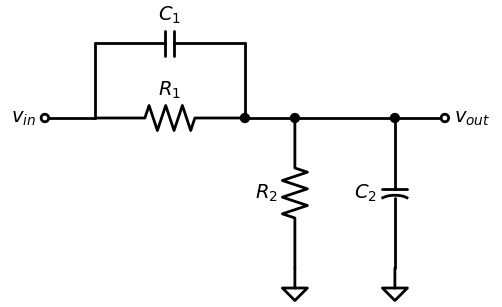

In [3]:
with schemdraw.Drawing() as d:
    d += (vin := elm.Dot(open=True).label('$v_{in}$', loc='left'))
    d += elm.Line().right().length(1)
    d.push()
    d += elm.Resistor().label('$R_1$')
    d.pop()
    d += elm.Line().up().length(1.5)
    d += elm.Capacitor().right().label('$C_1$')
    d += elm.Line().down().length(1.5)
    d += elm.Dot()
    d += elm.Line().right().length(1)
    d.push()
    d += elm.Resistor().down().label('$R_2$')
    d += elm.GroundSignal()
    d.pop()
    d += elm.Dot()
    d += elm.Line().right().length(2)
    d.push()
    d += elm.Capacitor2().down().label('$C_2$')
    d += elm.GroundSignal()
    d.pop()
    d += elm.Dot()
    d += elm.Line().right().length(1)
    d += elm.Dot(open=True).label('$v_{out}$', loc='right')

PHASE 4: NGSPICE NETLIST GENERATION & SIMULATION
Generate Netlist, Run Simulation, and Verify Output

Purpose:
    Generates a complete NGSPICE netlist using Python-defined component values.
    Runs AC and transient analyses in batch mode.
    Verifies that data files (output_ac.dat, output_tran.dat) are created for further plotting and analysis.

In [4]:
spice_netlist = """* Wideband RC Voltage Divider
.options savecurrents

* Main Circuit
R1 in out 470k
R2 out 0 1k
C1 in out 0.5745p
C2 out 0 270p

* Variations
R1a in outa 470k
R2a outa 0 1k
C1a in outa 0.63195p
C2a outa 0 270p

R1b in outb 470k
R2b outb 0 1k
C1b in outb 0.51705p
C2b outb 0 270p

V1 in 0 pulse(-0.1 0.1 0 0.1u 0.1u 5u 10u) dc 1 ac 1

.control
  ac dec 10 1 1G

  meas ac dB_Mat_10k   FIND vdb(out)  AT=10k
  meas ac dB_Over_10k  FIND vdb(outa) AT=10k
  meas ac dB_Undr_10k  FIND vdb(outb) AT=10k

  meas ac dB_Mat_100k  FIND vdb(out)  AT=100k
  meas ac dB_Over_100k FIND vdb(outa) AT=100k
  meas ac dB_Undr_100k FIND vdb(outb) AT=100k

  meas ac dB_Mat_1M    FIND vdb(out)  AT=1Meg
  meas ac dB_Over_1M   FIND vdb(outa) AT=1Meg
  meas ac dB_Undr_1M   FIND vdb(outb) AT=1Meg

  meas ac dB_Mat_10M   FIND vdb(out)  AT=10Meg
  meas ac dB_Over_10M  FIND vdb(outa) AT=10Meg
  meas ac dB_Undr_10M  FIND vdb(outb) AT=10Meg

  meas ac dB_Mat_100M  FIND vdb(out)  AT=100Meg
  meas ac dB_Over_100M FIND vdb(outa) AT=100Meg
  meas ac dB_Undr_100M FIND vdb(outb) AT=100Meg

  wrdata output_ac.dat v(out) v(outa) v(outb)
  
  tran 0.01u 30u

  meas tran Vmat_5u   FIND v(out)  AT=5u
  meas tran Vover_5u  FIND v(outa) AT=5u
  meas tran Vundr_5u  FIND v(outb) AT=5u

  meas tran Vmat_10u  FIND v(out)  AT=10u
  meas tran Vover_10u FIND v(outa) AT=10u
  meas tran Vundr_10u FIND v(outb) AT=10u
  
  meas tran Vmat_20u  FIND v(out)  AT=20u
  meas tran Vover_20u FIND v(outa) AT=20u
  meas tran Vundr_20u FIND v(outb) AT=20u

  meas tran Vmat_30u  FIND v(out)  AT=30u
  meas tran Vover_30u FIND v(outa) AT=30u
  meas tran Vundr_30u FIND v(outb) AT=30u
  
  wrdata output_tran.dat v(out) v(outa) v(outb)
.endc
.end
"""

with open("netlist.spice", "w") as f:
    f.write(spice_netlist)
print("netlist.spice created.")

netlist.spice created.


RUN SIMULATION WITH FILE CLEANUP
Ensure Fresh Simulation and Verify Output

Purpose:

    Ensures old simulation files are removed before running a new simulation.
    Runs NGSPICE in batch mode and verifies that AC and transient data files are generated.
    Provides immediate feedback if something goes wrong.

In [5]:
import subprocess

# Remove old files to be sure we are seeing new results
for f in ["output_ac.dat", "output_tran.dat"]:
    if os.path.exists(f):
        os.remove(f)

try:
    # Running in batch mode
    subprocess.run(["ngspice", "-b", "netlist.spice"], check=True)
    
    if os.path.exists("output_tran.dat"):
        print("Success! Simulation finished and data files are ready.")
    else:
        print("Simulation finished but no data files were found.")
except subprocess.CalledProcessError as e:
    print(f"Simulation failed with error code {e.returncode}")

Success! Simulation finished and data files are ready.


PHASE 5: PLOT TRANSIENT RESPONSE
    Read and Plot Transient Data

Data detected: 6 columns


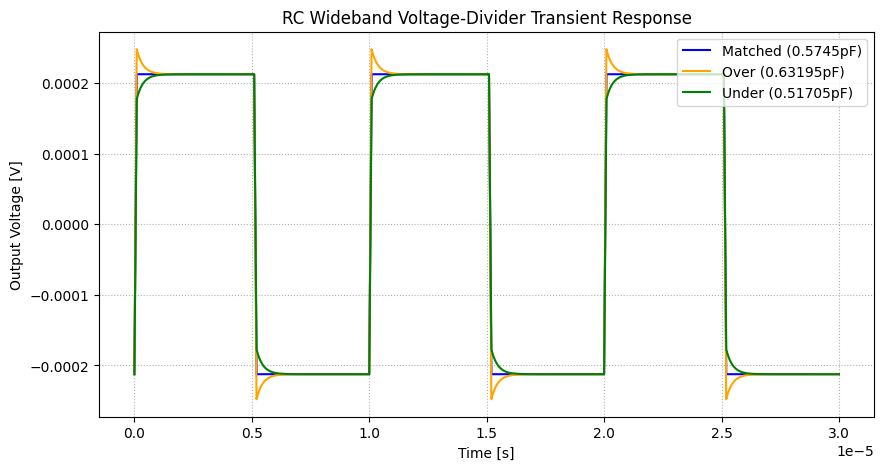

In [6]:
# Read the file without specifying columns first
df_tran = pd.read_csv("output_tran.dat", sep='\\s+', header=None)

# Let's check the shape to be safe
print(f"Data detected: {df_tran.shape[1]} columns")

# NGSPICE often exports: Time, Vout, Time, VoutA, Time, VoutB
# We only need the first Time and the Voltages
if df_tran.shape[1] == 6:
    df_tran.columns = ["time", "vout", "time2", "vouta", "time3", "voutb"]
elif df_tran.shape[1] == 4:
    df_tran.columns = ["time", "vout", "vouta", "voutb"]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_tran['time'], df_tran['vout'], label="Matched (0.5745pF)", color='blue')
plt.plot(df_tran['time'], df_tran['vouta'], label="Over (0.63195pF)", color='orange')
plt.plot(df_tran['time'], df_tran['voutb'], label="Under (0.51705pF)", color='green')

plt.title("RC Wideband Voltage-Divider Transient Response")
plt.xlabel("Time [s]")
plt.ylabel("Output Voltage [V]")
plt.legend(loc='upper right')
plt.grid(True, linestyle='dotted')
plt.show()

PHASE 6: READ FREQUENCY RESPONSE DATA
Read AC Simulation Output

Purpose:
    Loads NGSPICE AC simulation results into a pandas DataFrame.
    Handles multiple output nodes and varying file formats.
    Prepares the data for plotting frequency-domain response in the next cell.

In [7]:
# @title Read in SPICE frequency response data
df_ac = pd.read_csv("output_ac.dat", sep='\\s+', header=None)

# Handle the 9-column format (Frequency repeated for each node)
if df_ac.shape[1] == 9:
    df_ac.columns = [
        "freq", "vout_re", "vout_im", 
        "freq2", "vouta_re", "vouta_im", 
        "freq3", "voutb_re", "voutb_im"
    ]
elif df_ac.shape[1] == 7:
    df_ac.columns = ["freq", "vout_re", "vout_im", "vouta_re", "vouta_im", "voutb_re", "voutb_im"]

df_ac.head()

,freq,vout_re,vout_im,freq2,vouta_re,vouta_im,freq3,voutb_re,voutb_im
0,1.000000,0.002123,1.996766e-13,1.000000,0.002123,3.596375e-10,1.000000,0.002123,-3.592382e-10
1,1.258925,0.002123,2.513779e-13,1.258925,0.002123,4.527568e-10,1.258925,0.002123,-4.522541e-10
2,1.584893,0.002123,3.164661e-13,1.584893,0.002123,5.699871e-10,1.584893,0.002123,-5.693541e-10
3,1.995262,0.002123,3.984072e-13,1.995262,0.002123,7.175712e-10,1.995262,0.002123,-7.167744e-10
4,2.511886,0.002123,5.015649e-13,2.511886,0.002123,9.033686e-10,2.511886,0.002123,-9.023655e-10


PHASE 7: CALCULATE AC MAGNITUDE AND PHASE
Compute Magnitude and Phase from NGSPICE AC Data

Purpose:
    Converts NGSPICE output (real + imaginary) into magnitude and phase for each output node.
    Prepares data for frequency-domain plotting to analyze bandwidth and compensation performance.

In [8]:
# @title Calculate the magnitude and phase of the output voltage
# Note: NGSPICE writes the real and imaginary components of the voltage

# Collect all real components in a list
v_real = [ df_ac['vout_re'], df_ac['vouta_re'], df_ac['voutb_re'] ]

# Collect all imaginary components in a list
v_imag = [ df_ac['vout_im'], df_ac['vouta_im'], df_ac['voutb_im'] ]

# Iterate over the lists to get the magnitude and phase of the voltages
v_mag = [ np.sqrt(vr**2 + vi**2) for vr,vi in zip(v_real, v_imag) ]
v_phase = [ np.arctan2(vi, vr) * 180 / np.pi for vr,vi in zip(v_real, v_imag) ]

PHASE 8: PLOT AC MAGNITUDE RESPONSE
Frequency Response (Magnitude in dB)

Purpose:
    Converts voltage magnitudes to dB and plots them on a logarithmic frequency scale.
    Compares matched, over-, and under-compensation to illustrate the effect of C1 on bandwidth.
    Helps students visualize how RC compensation flattens the frequency response.

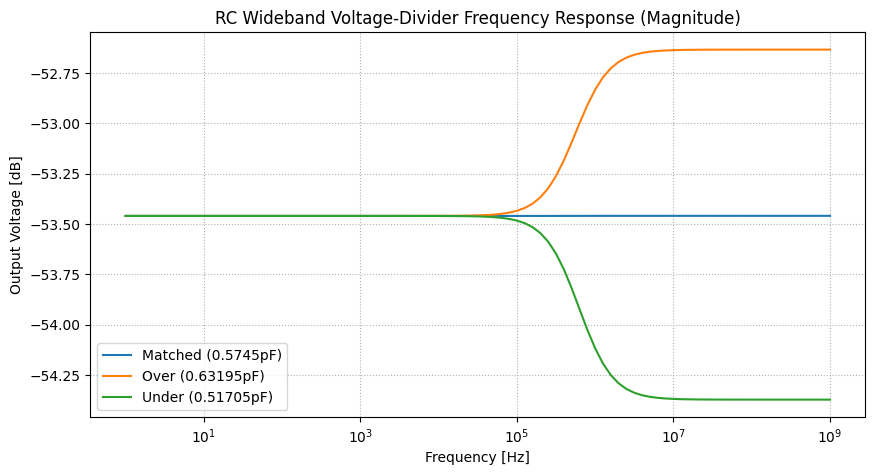

In [9]:
# @title Plot the magnitude frequency response of the wideband RC voltage-divider

# Define labels locally to reflect the Seed-based values
# C1_matched was calculated in Cell 1
v_label = ["Matched (0.5745pF)", "Over (0.63195pF)", "Under (0.51705pF)"]

plt.figure(figsize=(10, 5))
plt.title("RC Wideband Voltage-Divider Frequency Response (Magnitude)")

# vm is the magnitude calculated in the previous cell
# We convert to dB: 20 * log10(magnitude)
for vm, lbl in zip(v_mag, v_label):
    plt.semilogx(df_ac.freq, 20 * np.log10(vm), label=lbl, linestyle='-')

plt.xlabel("Frequency [Hz]")
plt.ylabel("Output Voltage [dB]")
plt.legend(loc='lower left')
plt.grid(True, which="both", linestyle='dotted')
plt.show()

PHASE 9: PLOT AC PHASE RESPONSE
Frequency Response (Phase in Degrees)

Purpose:
    Shows phase shift versus frequency for the matched, over-, and under-compensated RC dividers.
    Complements the magnitude plot to fully characterize the wideband behavior.
    Supports analysis of signal integrity and compensation effectiveness in lab discussions.

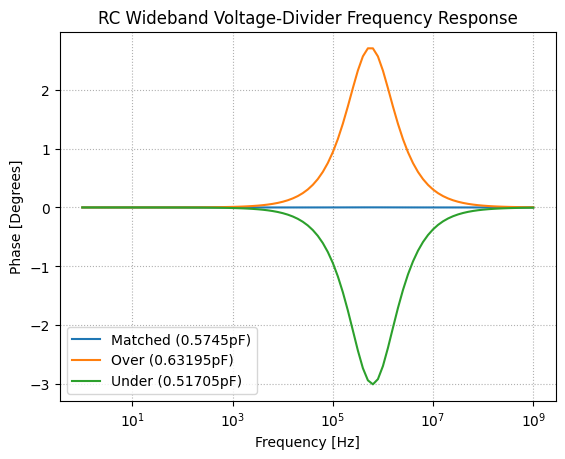

In [10]:
# @title Plot the phase frequency response of the wideband RC voltage-divider

plt.title("RC Wideband Voltage-Divider Frequency Response")

for vp,lbl in zip(v_phase,v_label):
  plt.semilogx(df_ac.freq, vp, label=lbl, linestyle='-')

plt.xlabel("Frequency [Hz]")
plt.ylabel(r"Phase [Degrees]")
plt.legend(loc='lower left')
plt.grid(linestyle='dotted')
plt.show()

IV. DATA AND OBSERVATION

Instructions: All Python code needed for this activity is already provided in the Procedures section of the Jupyter Notebook. Do not add or write new code. Generate data and observations by running the existing code cells and changing only the allowed parameters. Record all results and observations directly in the notebook.

Instruction:

    Only modify student_number.
    Do not change any other line of code in the following cells.

In [15]:
# Student Number Input
student_number = "TUPM-22-0100"  # <-- Replace with your own student number

In [16]:
# Standard Series Pools
# This defines all standard resistor and capacitor values used in the simulation.

import numpy as np

# E12 Series
E12 = np.array([1.0, 1.2, 1.5, 1.8, 2.2, 2.7, 3.3, 3.9, 4.7, 5.6, 6.8, 8.2])

# Component decades (standard range)
R_decades = np.array([1e3, 10e3, 100e3, 1e6])       # 1 kΩ to 1 MΩ
C_decades = np.array([1e-12, 10e-12, 100e-12])      # 1 pF to 100 pF

# Generate full list of standard values
R_list = np.sort(np.concatenate([E12 * d for d in R_decades]))
C_list = np.sort(np.concatenate([E12 * d for d in C_decades]))


In [17]:
# Student-Based Component Selection

# Extract digits from student_number
digits = ''.join(ch for ch in str(student_number) if ch.isdigit())

if len(digits) == 0:
    raise ValueError("Student number must contain at least one digit.")

# Stable mapping using last 6 digits
seed = int(digits[-6:])
rng = np.random.default_rng(seed)

# Select R1, R2, C2 from standard-value lists
R1_s = float(rng.choice(R_list))
R2_s = float(rng.choice(R_list))
C2_s = float(rng.choice(C_list))

# Optional: enforce R1 ≥ R2
if R1_s < R2_s:
    R1_s, R2_s = R2_s, R1_s


In [18]:
# Matched Capacitance Computation

# Wideband match condition: R1*C1 = R2*C2  -> C1 = (R2/R1)*C2
C1_matched_s = (R2_s / R1_s) * C2_s

# Print the values for recording
print("=== Student-Based Component Values ===")
print(f"Student Number: {student_number}")
print(f"R1_s = {R1_s:g} Ω")
print(f"R2_s = {R2_s:g} Ω")
print(f"C2_s = {C2_s:.3e} F  ({C2_s*1e12:.3f} pF)")
print(f"C1_matched_s = {C1_matched_s:.3e} F  ({C1_matched_s*1e12:.4f} pF)")


=== Student-Based Component Values ===
Student Number: TUPM-22-0100
R1_s = 470000 Ω
R2_s = 1000 Ω
C2_s = 2.700e-10 F  (270.000 pF)
C1_matched_s = 5.745e-13 F  (0.5745 pF)


Transient Response Data Recording

Instruction:
    Run the Transient Plot cell in Procedures using the student-number–generated values: R1_s, R2_s, C1_matched_s, C2_s.
    Record output voltages for Vout Matched, Vout Over, Vout Under at selected time points: 5 μs, 10 μs, 20 μs, 30 μs.
    Optionally, run ±10% tolerance for R1 or C1 and observe differences.

| Time (μs) | Vout Matched (V) | Vout Over (V) | Vout Under (V) |
| --------- | ---------------- | ------------- | -------------- |
| 5         | 0.0002123142     | 0.0002123142  | 0.0002123142   |
| 10        | -0.0002123142    | -0.0002123142 | -0.0002123142  |
| 20        | -0.0002123142    | -0.0002123142 | -0.0002123142  |
| 30        | -0.0002123142    | -0.0002123142 | -0.0002123142  |

Results Discussion:

**Compare rise time, overshoot, and settling time.** <br>
**Answer:**  The rise time is the time it takes for the signal to transition from one state to another. As demonstrated in the activity, the rise time of the signal to transition from -0.0002 to 0.0002 is 0.1μsec. Overshoot occurs at sharp discontinues edges. Settling time, on the other hand, is the time it takes for the output to settle in a steady state. 

**How does over- and under-compensation differ from the matched case?** <br>
**Answer:**  The over-compensation happens due to the R1C1 being higher than the R2C2 while under-compensation happens due R2C2 value behing higher than R1C1.

**How do ±10% tolerance variations affect transient response?** <br>
**Answer:**  ±10% tolerance variations affect the transient response of the system causing over- and under-compensation. Adding a +10% tolerance variation to R1 and C1 caused the circuit to be over-compensated while adding -10% tolerance variation to the same components caused the circuit to be under-compensated.

Frequency Response Data Recording

Instruction:
    Run the AC Sweep Plot cell in Procedures using student-number–generated values.
    Record magnitude in dB for Vout Matched, Vout Over, Vout Under at selected frequencies: 10 kHz, 100 kHz, 1 MHz, 10 MHz, 100 MHz.
    Optionally, test ±10% tolerance and observe changes.

| Frequency (Hz) | Vout Matched (dB) | Vout Over (dB) | Vout Under (dB) |
| -------------- | ----------------- | -------------- | --------------- |
| 1e4            | -53.46042         | -53.46016      | -53.46065       |
| 1e5            | -53.46040         | -53.43501      | -53.48350       |
| 1e6            | -53.46006         | -52.83241      | -54.11881       |
| 1e7            | -53.45994         | -52.63653      | -54.36972       |
| 1e8            | -53.45994         | -52.63395      | -54.37321       |

Results Discussion:

**Identify flat regions, -3 dB point, and bandwidth differences.**
**Answer:**  The flat region is the passband where the circuit maintains constant gain across frequencies. The -3dB point is the cutoff frequency where the output voltage has dropped to -3db or 70.7% of its original value in the flat region. The bandwidth refers to the range of frequencies that the circuit can handle. It is the difference betweent the minimum and maximum frequency at -3db point.

**How does changing R or C affect attenuation and phase?**
**Answer:**  By increasing R1, the attenuation increases in lower frequencies or higher frequencies if C2 was increased. Meanwhile, C1 affects the phase shift of the circuit. Higher C1 causes positive phase shift and lower C1 causes negative phase shift.

**Compare matched vs. over- and under-compensation at high frequencies.**
**Answer:**  At high frequencies, the magnitude of the matched circuit shows constant gain. However, over-compensation showed higher gain and under-compensation showed lower gain at high frequencies.

V. DATA AND OBSERVATION
1. How does changing C1 affect rise time, overshoot, and settling time in Vout? <br>
**Answer:** Changing C1 directly affects the performance of the circuit. Increasing C1 causes over-compensation which decreases the rise time but it creates an overshoot. Decreasing C1 causes under-compensation which removes the overshoot but increases the rise time as the signal slowly creeps to the final value. Both scenarios causes settling time to increase.


2. Compare Vout Over and Vout Under with the matched case. How are transient and frequency responses affected? <br>
**Answer:** The Vout over and Vout under both caused distortion in the signal compared to the matched case which showed an ideal pulse wave. In terms of frequency response, the matched case showed an ideal case wherein there is no filtering of low to high frequencies. For the over-compensated circuit, it became a highpass filter while the under-compensated circuit became a lowpass filter.


3. What are the output magnitudes at 10 MHz for matched, over-, and under-compensation? What does this tell you about high-frequency behavior? <br>
**Answer:** At 10MHz, the matched case showed constant gain. For over-compensation, the graph showed higher gain while under-compensation showed attenuation. This means that at high frequencies, C1 acts like a short circuit which boosts the signal at high frequencies but causes a delay to the signal if C1 is decreased.


4. How does phase vary between matched, over-, and under-compensation? How could this affect signal integrity? <br>
**Answer:** The matched case showed an ideal 0 degrees phase shift. For over-compensation, the signal had a positive phase shift while the under-compensation had a negative phase shift. This phase shift could cause timing error due to the timing of voltage and current to each other.


5. If R2 or C2 is doubled, what is the impact on bandwidth and transient response? <br>
**Answer:** Doubling R2 or C2 causes under-compensation. This causes the bandwidth to decrease and the transient response to have undershoot.



VI. CONCLUSION <br>
In this activity, the learner used NGSpice, and Python Notebook to simulate the compensated voltage divider. The learner plotted the bode plot of the circuit to show the effects of over and under-compensation. The transient response of the circuit was also plotted to show the effects in the output voltage. Distortions such as overshoot and undershoot was directly observed in the plot due to the difference between the resistors and capacitors. This also affected the settling time since the extra distortions added some time for the signal to settle to the final value. 

At the end of this activity, the learner simulated a new circuit based on their student number. This allowed them to have new values for the resistors and capacitors of the circuit.




